linear kernel :
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

LinearSVC :
 LinearSVC(C=1000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 



C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be a

RBF kernel :
 SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 



C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be a

poly kernel :
 SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

sigmoid kernel :
 SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 



C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


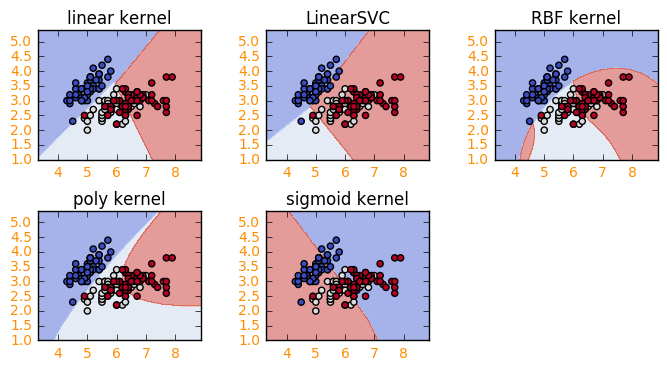

In [1]:
import numpy as np    
import matplotlib.pyplot as plt    
from sklearn import svm, datasets    
    
iris = datasets.load_iris()    
X = iris.data[:, :2]  #萼片长宽   
y = iris.target    #类别    
C = 1e3   
svc = svm.SVC(kernel="linear").fit(X, y)    
rbf_svc = svm.SVC(kernel="rbf", gamma=0.1, C=C).fit(X, y)    
poly_svc = svm.SVC(kernel="poly", gamma=0.1,degree=2, C=C).fit(X, y)    
sigmoid_svc = svm.SVC(kernel="sigmoid",gamma=0.1,C=C).fit(X, y)  
#在svm模块中还有一个较为简单的线性分类函数：LinearSVC()，  
#其不支持kernel参数，因为设计思想就是线性分类。  
lin_svc =svm.LinearSVC(C=C).fit(X, y)    
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.02),    
                     np.arange(y_min, y_max, 0.02))    
test_x = np.c_[xx.ravel(), yy.ravel()]    
titles = ['linear kernel',    
          'LinearSVC',    
          'RBF kernel',    
          'poly kernel',  
          'sigmoid kernel']    
  
plt.figure(figsize=(8,4))    
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc,sigmoid_svc)):    
    plt.subplot(2, 3, i+1)    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)   
    print(titles[i],':\n',clf,'\n')  
    Z = clf.predict(test_x).reshape(xx.shape)    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)     
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)    
    plt.xlim(xx.min(), xx.max())    
    plt.ylim(yy.min(), yy.max())    
    plt.xticks(fontsize=10, color="darkorange")    
    plt.yticks(fontsize=10, color="darkorange")    
    plt.title(titles[i])    
    
plt.show() 